In [35]:
% some housekeeping stuff
register_graphics_toolkit ("gnuplot");
available_graphics_toolkits ();
graphics_toolkit ("gnuplot")
clear
% load packages
pkg load statistics
% clear and warning off
clear
warning off
% end of housekeeping

### simple example

consider fixed pH.  you don't have to worry about TOTH!

tableau for aluminum hydroxide with solids

display = working, please be patient


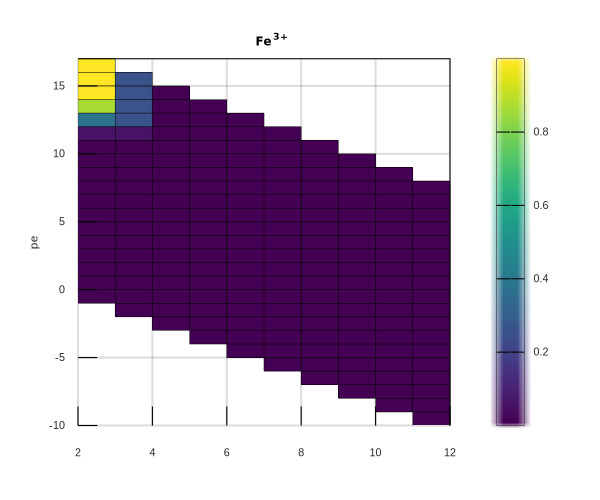

In [36]:
%plot -s 600,500 -f 'svg'
% start of tableau (problem definition)
% you can change this part

Tableau=[...
%H      e        FeIII      logK     phase     species1 
1       0        0          0        0        {'H'}
0       1        0          0        0        {'e '}
0       0        1          0        0        {'FeIII'}
-1      0        0          -14      0        {'OH'}
0       1        1          13.2     0        {'FeII'}
%-1      0        1          -2.19    0        {'FeIIIOH'}
-3      0        1          -3.4     1        {'FeIIIOH3s'}
-2      1        1          0.82     1        {'FeIIOH2s'} 
];

%input totals and pH and pe
%%%%%%%%%%%%%%%%%%%%%%%%%%55
FeT=1e-5; T=FeT;
pH=2:1:12;
pe=17:-1:-10;
%%%%%%%%%%%%%%%%%%%%%%%%%%
%pe=-pH; % reducing

% end of tableau.  ------------------ % ----------------------------------------------
% no changes below this line --------------------------------------------------------

% initialize variables
H=NaN(length(pe),length(pH)); 
e=NaN(length(pe),length(pH)); 
FeIII=NaN(length(pe),length(pH)); 
FeII=NaN(length(pe),length(pH));
OH=NaN(length(pe),length(pH)); 
%FeIIIOH=NaN(length(pe),length(pH)); 
FeIIIOH3s=NaN(length(pe),length(pH)); 
FeIIOH2s=NaN(length(pe),length(pH)); 
MASSERR=NaN(length(pe),length(pH));

flag1=2; flag2=1; % default to logX solution scheme with analtyical derivatives
database=[]; % deacivated PHREEQC solver.

display='working, please be patient'

for k=1:length(pe)
      for i=1:length(pH)
          boundaryox=20.75-pH(i); boundaryred=0-pH(i); %stability limits of water
          if pe(k)<boundaryox
              if pe(k)>boundaryred
                     %disp=[pH(i) pe(k)]
                     %[FeIII(k,i),FeII(k,i),HFO(k,i),FeIIIOH(k,i),FeIIIOH2(k,i),FeIIIOH3(k,i),FeIIIOH4(k,i),masserr(k,i)]=returnFespeciation(FeT,pH(i),pe(k));
                     [KSOLID,ASOLID,SOLIDNAMES,KSOLUTION,ASOLUTION,SOLUTIONNAMES]=processtableau(Tableau,pH(i),pe(k));
                     [SPECIESCONCS,SPECIATIONNAMES,MASSERR(k,i),X]=returnspeciationRE(KSOLID,ASOLID,SOLIDNAMES,KSOLUTION,ASOLUTION,SOLUTIONNAMES,T,flag1,flag2,database);
                    for l=1:size(SPECIESCONCS,1)
                          txt=[SPECIATIONNAMES(l,:),'(k,i)=SPECIESCONCS(l);'];
                          eval(txt)
                    end
            end
           end
      end
end


% this will generate the outputs

%subplot(421);
surf(pH,pe,FeIII./FeT)
axis([min(pH) max(pH) min(pe) max(pe) 0 1])
set(gca,'linewidth',2)
xlabel('pH','fontsize',12); ylabel('pe')
view([0 90])
colorbar
title('Fe^{3+}')








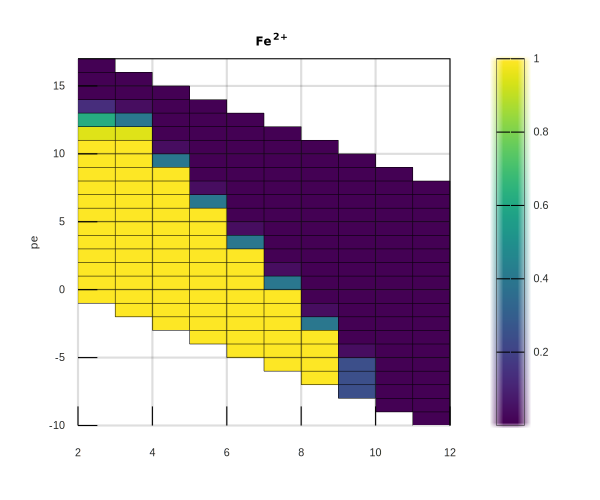

In [37]:
%subplot(422);
surf(pH,pe,FeII./FeT)
axis([min(pH) max(pH) min(pe) max(pe) 0 1])
set(gca,'linewidth',2)
xlabel('pH','fontsize',12); ylabel('pe')
view([0 90])
colorbar
title('Fe^{2+}')

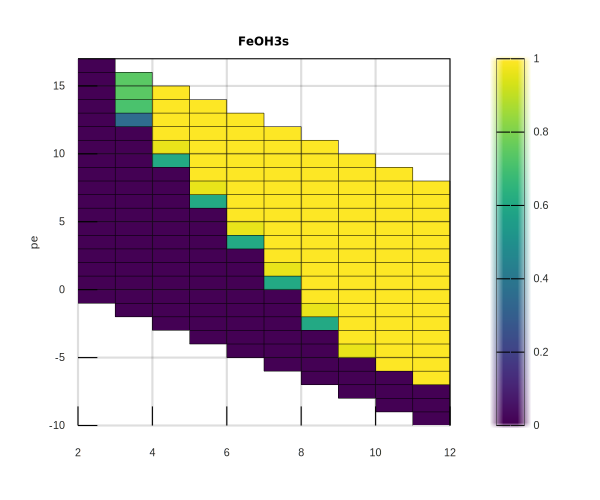

In [38]:
%subplot(423);
surf(pH,pe,FeIIIOH3s./FeT)
axis([min(pH) max(pH) min(pe) max(pe) 0 1])
set(gca,'linewidth',2)
xlabel('pH','fontsize',12); ylabel('pe')
view([0 90])
colorbar
title('FeOH3s')


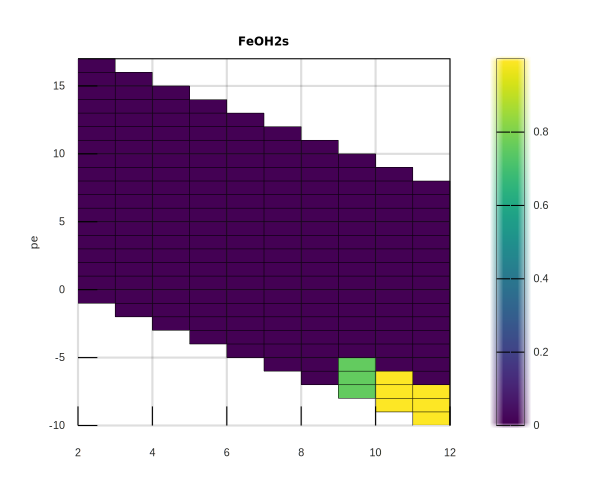

In [39]:

%subplot(424);
surf(pH,pe,FeIIOH2s./FeT)
axis([min(pH) max(pH) min(pe) max(pe) 0 1])
set(gca,'linewidth',2)
xlabel('pH','fontsize',12); ylabel('pe')
view([0 90])
colorbar
title('FeOH2s')

MASSERRfactor = 1.0000e-13


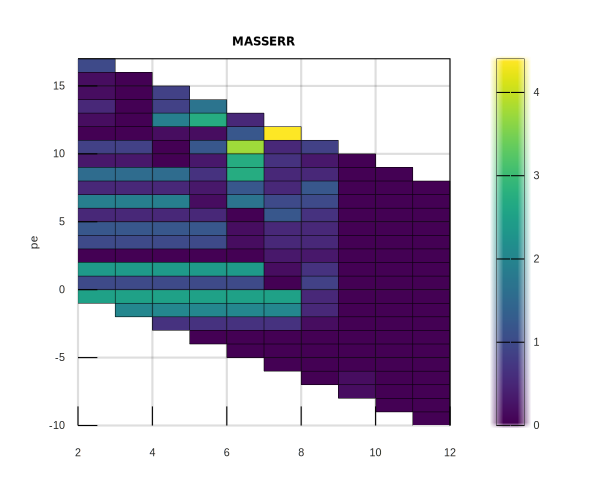

In [40]:
MASSERRfactor=max(MASSERR(:)); magnitude=floor(log10(MASSERRfactor));
MASSERRfactor=10^magnitude
MASSERR=MASSERR./MASSERRfactor;
surf(pH,pe,MASSERR)
axis([min(pH) max(pH) min(pe) max(pe) 0 max(max(MASSERR))])
set(gca,'linewidth',2)
xlabel('pH','fontsize',12); ylabel('pe')
view([0 90])
colorbar
zMin = min(MASSERR(:));
zMax = max(MASSERR(:));
caxis([zMin, zMax]);
title('MASSERR')